In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('bike_buyers.csv')
print(data.shape)
data.head(6)

(1000, 13)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No


In [39]:
data.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [41]:
data = data.dropna()
# data = data.drop(['ID'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                952 non-null    int64  
 1   Marital Status    952 non-null    object 
 2   Gender            952 non-null    object 
 3   Income            952 non-null    float64
 4   Children          952 non-null    float64
 5   Education         952 non-null    object 
 6   Occupation        952 non-null    object 
 7   Home Owner        952 non-null    object 
 8   Cars              952 non-null    float64
 9   Commute Distance  952 non-null    object 
 10  Region            952 non-null    object 
 11  Age               952 non-null    float64
 12  Purchased Bike    952 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.1+ KB


In [42]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

print(data.head())

      ID  Marital Status  Gender   Income  Children  Education  Occupation  \
0  12496               0       0  40000.0       1.0          0           4   
1  24107               0       1  30000.0       3.0          3           0   
2  14177               0       1  80000.0       5.0          3           3   
4  25597               1       1  30000.0       0.0          0           0   
5  13507               0       0  10000.0       2.0          3           2   

   Home Owner  Cars  Commute Distance  Region   Age  Purchased Bike  
0           1   0.0                 0       0  42.0               0  
1           1   1.0                 0       0  43.0               0  
2           0   2.0                 3       0  60.0               0  
4           0   0.0                 0       0  36.0               1  
5           1   0.0                 1       0  50.0               0  


* Normalization


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
print(scaled_data)

[[0.0810972  0.         0.         ... 0.         0.265625   0.        ]
 [0.71052204 0.         1.         ... 0.         0.28125    0.        ]
 [0.17222313 0.         1.         ... 0.         0.546875   0.        ]
 ...
 [0.95798775 1.         1.         ... 0.5        0.15625    1.        ]
 [0.46966987 1.         1.         ... 0.5        0.203125   0.        ]
 [0.06076869 1.         1.         ... 0.5        0.4375     1.        ]]


In [44]:
# split data
X = scaled_data[:,:-1]
print(X[0][:])
y = data.iloc[:,-1].values
print(y[0])

[0.0810972 0.        0.        0.1875    0.2       0.        1.
 1.        0.        0.        0.        0.265625 ]
0


# Feature Selection

In [45]:
from sklearn.feature_selection import SelectKBest, chi2
select_feature =  SelectKBest(score_func=chi2, k = 6)
f_best = select_feature.fit(X, y)               
X_new = f_best.transform(X)
X_new.shape

(952, 6)

In [46]:
data_score = pd.DataFrame(select_feature.scores_)
data_columns = pd.DataFrame(data.columns[:-1])

feature_score = pd.concat([data_columns, data_score], axis = 1)
feature_score.columns = ['Features', 'Score']
feature_score

,Features,Score
0,ID,0.526302
1,Marital Status,5.824995
2,Gender,0.164689
3,Income,0.295499
4,Children,3.635459
5,Education,4.980996
6,Occupation,0.074135
7,Home Owner,0.327737
8,Cars,8.518582
9,Commute Distance,2.524616


In [47]:
kept_features = pd.DataFrame({'columns': data.columns[:-1],
                              'Kept': select_feature.get_support()})
kept_features

,columns,Kept
0,ID,False
1,Marital Status,True
2,Gender,False
3,Income,False
4,Children,True
5,Education,True
6,Occupation,False
7,Home Owner,False
8,Cars,True
9,Commute Distance,True


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, random_state = 42, test_size=0.2)

# Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [50]:
# test model
Y_pred = gnb.predict(X_test)

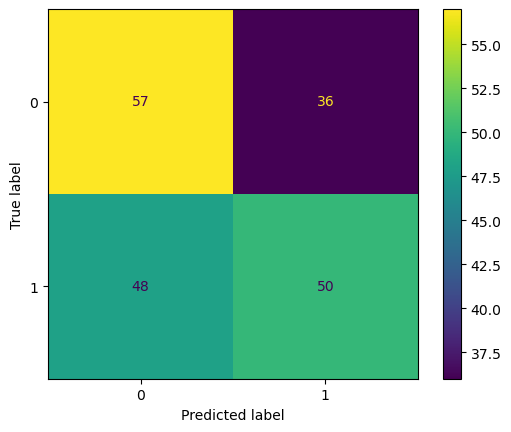

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [52]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.61      0.58        93
           1       0.58      0.51      0.54        98

    accuracy                           0.56       191
   macro avg       0.56      0.56      0.56       191
weighted avg       0.56      0.56      0.56       191



# Multinomial Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB()

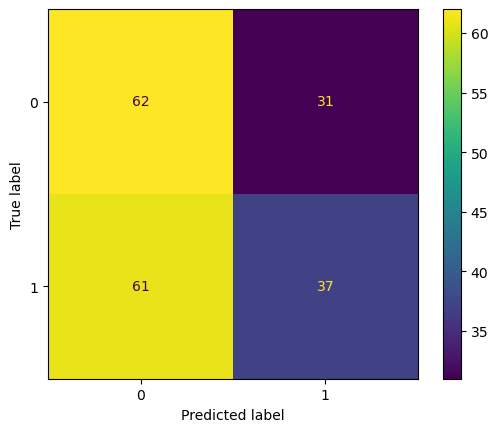

In [54]:
# test model
Y_pred = mnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [55]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        93
           1       0.54      0.38      0.45        98

    accuracy                           0.52       191
   macro avg       0.52      0.52      0.51       191
weighted avg       0.52      0.52      0.51       191



# Bernoulli Naive Bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

BernoulliNB()

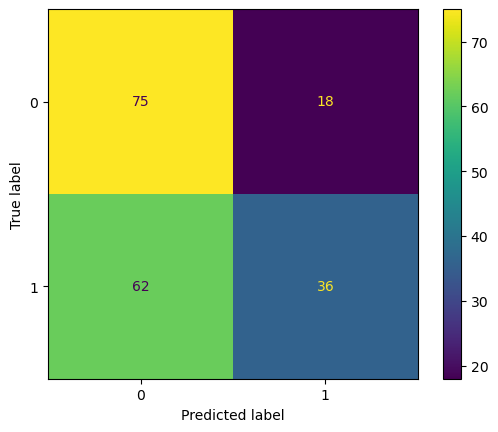

In [57]:
# test model
Y_pred = bnb.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [58]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.55      0.81      0.65        93
           1       0.67      0.37      0.47        98

    accuracy                           0.58       191
   macro avg       0.61      0.59      0.56       191
weighted avg       0.61      0.58      0.56       191



# K Nearest Neighbor

In [59]:
# Train model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, p=2, metric='euclidean')
KNN.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean')

In [60]:
# test model
Y_pred = KNN.predict(X_test)

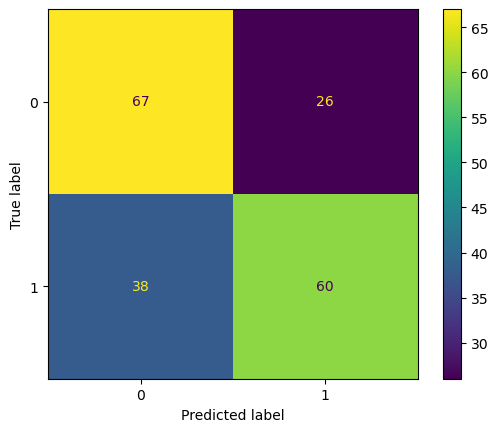

In [61]:
# test model
Y_pred = KNN.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [62]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68        93
           1       0.70      0.61      0.65        98

    accuracy                           0.66       191
   macro avg       0.67      0.67      0.66       191
weighted avg       0.67      0.66      0.66       191



# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(max_depth=5)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
Y_pred = dTree.predict(X_test)

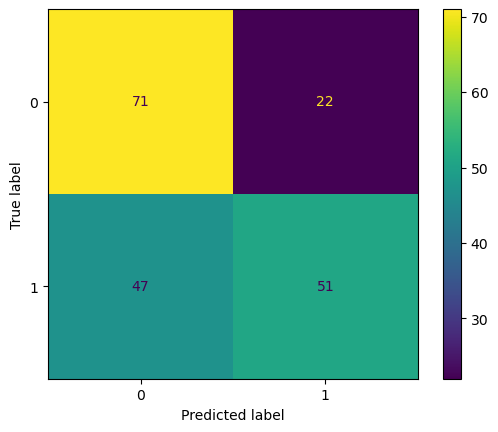

In [65]:
# test model
Y_pred = dTree.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [66]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67        93
           1       0.70      0.52      0.60        98

    accuracy                           0.64       191
   macro avg       0.65      0.64      0.63       191
weighted avg       0.65      0.64      0.63       191



In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [68]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20, 10, 5), batch_size= 10, activation='tanh', max_iter=100)
model.fit(X_train, Y_train)

/Users/phanhoang/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', batch_size=10, hidden_layer_sizes=(20, 10, 5),
              max_iter=100)

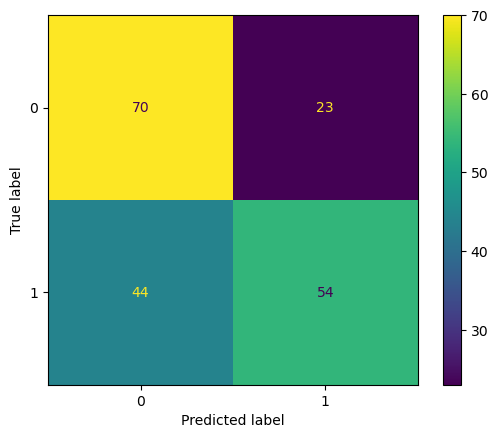

In [69]:
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [70]:
# # Plot the accuracies
# plt.bar(['MLPClassifier', 'DecisionTree'], [mlp_accuracy, dt_accuracy])
# plt.ylabel('Accuracy')
# plt.show()

/Users/phanhoang/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/phanhoang/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/phanhoang/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/phanhoang/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


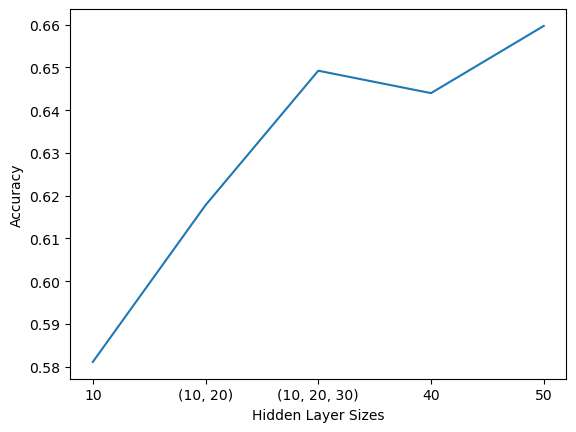

In [71]:
hidden_layer_sizes = [(10), (10, 20), (10, 20, 30), (40), (50)]
accuracies = []
for hls in hidden_layer_sizes:
    # Initialize the classifier
    mlp = MLPClassifier(hidden_layer_sizes=hls)
    
    # Train the classifier
    mlp.fit(X_train, Y_train)
    
    # Make predictions
    predictions = mlp.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, predictions)
    
    # Append accuracy to the accuracies list
    accuracies.append(accuracy)

# Plot the accuracies
plt.plot([str(hls) for hls in hidden_layer_sizes], accuracies)
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.show()

# Pearson Corelation



In [73]:
scaled_data

array([[0.0810972 , 0.        , 0.        , ..., 0.        , 0.265625  ,
        0.        ],
       [0.71052204, 0.        , 1.        , ..., 0.        , 0.28125   ,
        0.        ],
       [0.17222313, 0.        , 1.        , ..., 0.        , 0.546875  ,
        0.        ],
       ...,
       [0.95798775, 1.        , 1.        , ..., 0.5       , 0.15625   ,
        1.        ],
       [0.46966987, 1.        , 1.        , ..., 0.5       , 0.203125  ,
        0.        ],
       [0.06076869, 1.        , 1.        , ..., 0.5       , 0.4375    ,
        1.        ]])

In [74]:
data

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,0,0,40000.0,1.0,0,4,1,0.0,0,0,42.0,0
1,24107,0,1,30000.0,3.0,3,0,1,1.0,0,0,43.0,0
2,14177,0,1,80000.0,5.0,3,3,0,2.0,3,0,60.0,0
4,25597,1,1,30000.0,0.0,0,0,0,0.0,0,0,36.0,1
5,13507,0,0,10000.0,2.0,3,2,1,0.0,1,0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,0,1,80000.0,5.0,3,3,1,3.0,1,1,46.0,0
995,23731,0,1,60000.0,2.0,2,3,1,2.0,3,1,54.0,1
996,28672,1,1,70000.0,4.0,1,3,1,0.0,3,1,35.0,1
998,19664,1,1,100000.0,3.0,0,1,0,3.0,1,1,38.0,0


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

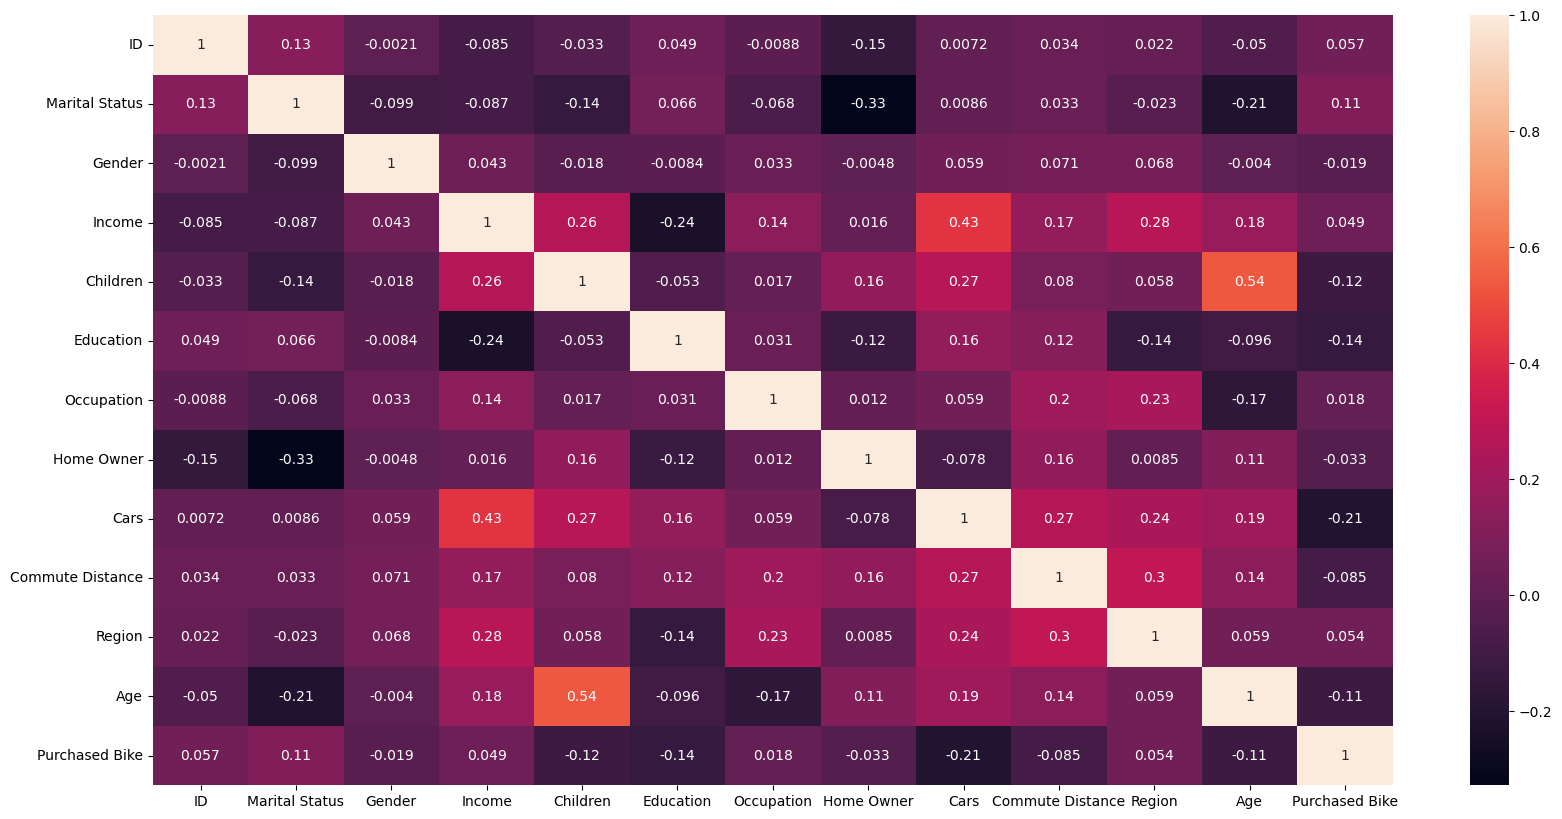

In [80]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier


clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=10, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

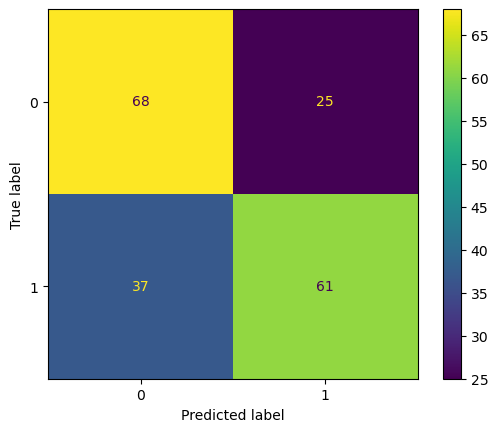

In [89]:
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)


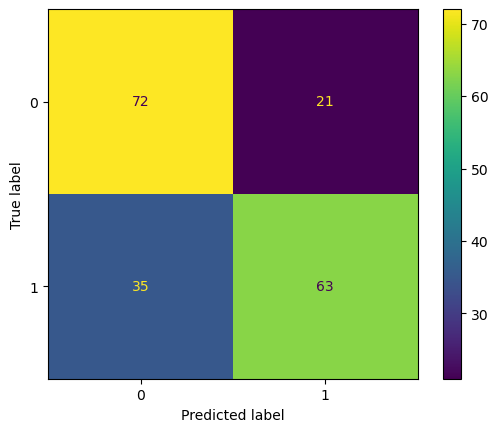

In [106]:
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()